In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
deliveries.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [4]:
dc_srh=matches[((matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')) & ((matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad'))].copy()
dc=matches[(matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')].copy()
srh=matches[(matches.team1=='Sunrisers Hyderabad') | (matches.team2=='Sunrisers Hyderabad')].copy()
dc_srh.shape,dc.shape,srh.shape

((26, 18), (177, 18), (183, 18))

In [5]:
dc_srhdeli=deliveries[((deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')) & ((deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad'))].copy()
dcdeli=deliveries[(deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')].copy()
srhdeli=deliveries[(deliveries.batting_team=='Sunrisers Hyderabad') | (deliveries.bowling_team=='Sunrisers Hyderabad')].copy()
dc_srhdeli.shape,dcdeli.shape,srhdeli.shape

((6140, 21), (41383, 21), (43760, 21))

In [6]:
dc_srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
65,66,2008,Hyderabad,2008-04-22,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Delhi Capitals,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
97,98,2008,Delhi,2008-05-15,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Delhi Capitals,12,0,A Mishra,Feroz Shah Kotla,BG Jerling,GA Pratapkumar,NaN
135,136,2009,Centurion,2009-04-30,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,DP Nannes,SuperSport Park,GAV Baxter,AM Saheba,NaN


In [7]:
dc.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN


In [8]:
srh.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [9]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['rosybrown','aquamarine'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

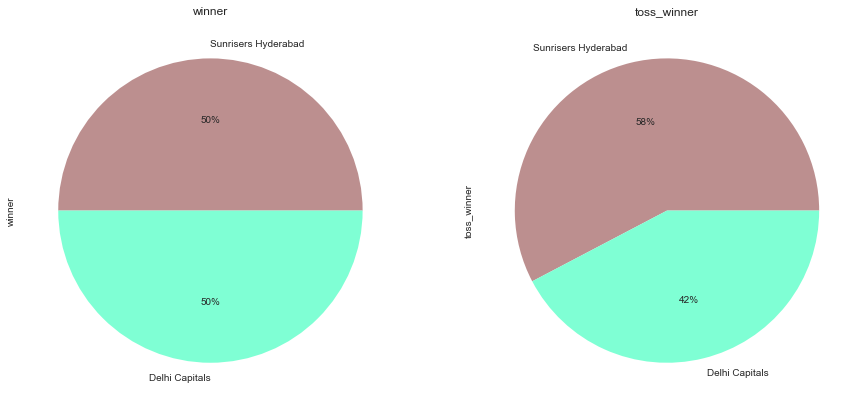

In [10]:
cat_plot(dc_srh,['winner','toss_winner'],(15,8),'pie')

### We can observe that there is 50-50 chances for both the teams to win the match but the toss winning percentage is higher for SRH

In [11]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='navy')
        ax[i].set_title(columns[i])

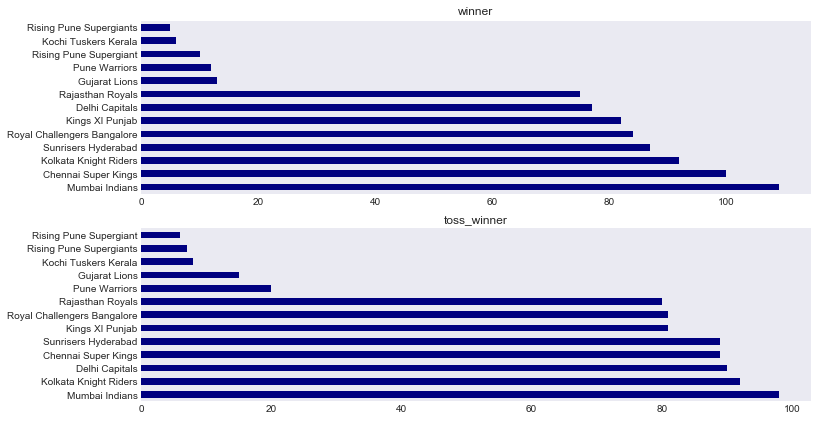

In [12]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

### Here we can see that there is higher overall winning chance for SRH whereas the toss wins are higher for DC
- As the data doesn't give any proper indication for who will win we will go with the team with highes overall wins

# Q2

In [13]:
total_run=dc_srhdeli.groupby('match_id').total_runs.sum()
total_run.describe()

count     26.000000
mean     313.538462
std       55.685711
min      161.000000
25%      287.750000
50%      320.000000
75%      350.750000
max      383.000000
Name: total_runs, dtype: float64

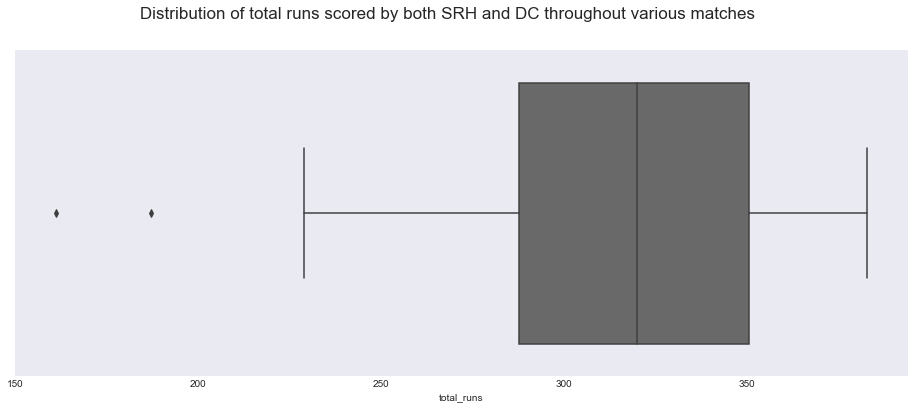

In [14]:
plt.figure(figsize=(16,6)).suptitle('Distribution of total runs scored by both SRH and DC throughout various matches',fontsize=17)
sns.boxplot(total_run,color='dimgray')


### Looking at the above distribution and considering the mean it will be safe to assume that the total runs will be less than 320

# Q3

In [15]:
dc_srhdeli.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [16]:
b_caughtout=dc_srhdeli[(dc_srhdeli.dismissal_kind=='caught') | (dc_srhdeli.dismissal_kind=='caught and bowled')].groupby(['match_id']).count()
b_caughtout=b_caughtout.dismissal_kind
b_caughtout.describe()

count    26.000000
mean      7.192308
std       2.623269
min       3.000000
25%       5.000000
50%       7.000000
75%       8.750000
max      13.000000
Name: dismissal_kind, dtype: float64

(-2.5, 15)

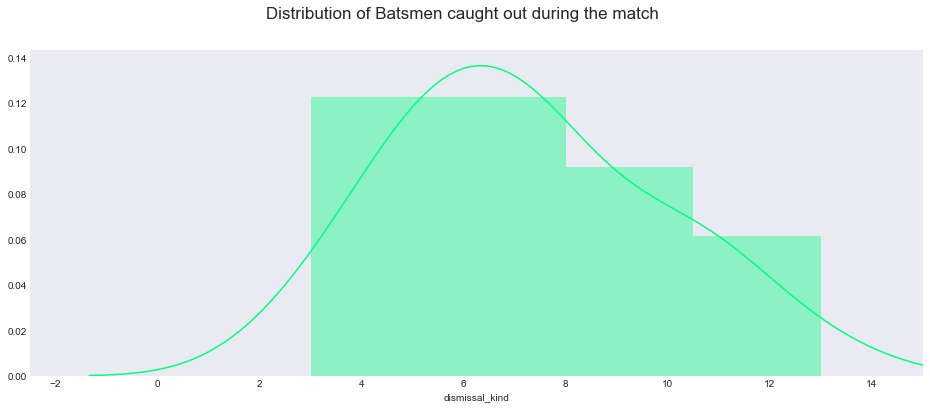

In [17]:
plt.figure(figsize=(16,6)).suptitle('Distribution of Batsmen caught out during the match',fontsize=17)
sns.distplot(b_caughtout,color='springgreen')
plt.xlim([-2.5,15])

### As we can infer from the above graph, the instances where batsmen get caught out will happen around 2-8 times in the match but as we don't have that much of an extended range in the options so we will go with 4-8

# Q4

In [18]:
dc_6score=dc_srhdeli.query('batting_team=="Delhi Capitals" & over<=6').groupby('match_id').total_runs.sum()
srh_6score=dc_srhdeli.query('batting_team=="Sunrisers Hyderabad" & over<=6').groupby('match_id').total_runs.sum()


In [19]:
print('Delhi Capitals \n\n',dc_6score.describe(),'\n\n\n Sunrisers Hyderabad \n\n',srh_6score.describe())

Delhi Capitals 

 count    26.000000
mean     45.576923
std      10.473483
min      26.000000
25%      38.250000
50%      48.000000
75%      52.750000
max      64.000000
Name: total_runs, dtype: float64 


 Sunrisers Hyderabad 

 count    26.000000
mean     49.000000
std      13.272528
min      25.000000
25%      41.000000
50%      46.500000
75%      53.500000
max      84.000000
Name: total_runs, dtype: float64


(-40, 30)

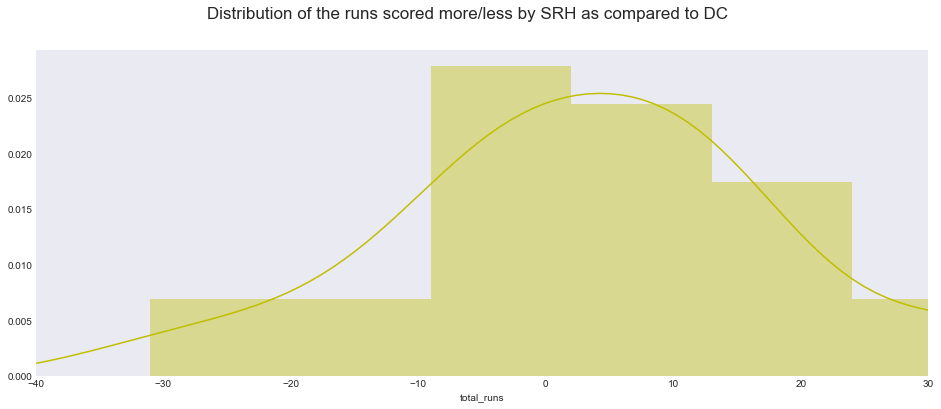

In [20]:
plt.figure(figsize=(16,6)).suptitle('Distribution of the runs scored more/less by SRH as compared to DC',fontsize=17)
sns.distplot(srh_6score-dc_6score,color='y')
plt.xlim([-40,30])


### From the above distribution and central tendency measures we can assume that SRH will score around 0-5 runs more than DC in the 1st 6 overs

# Q5

In [21]:
dc_srhdeli.extra_runs=dc_srhdeli.extra_runs.replace(0,np.nan)

extra_runs_count=dc_srhdeli.groupby('match_id').extra_runs.sum()
extra_runs_count.describe()

count    26.000000
mean     13.269231
std       4.635150
min       5.000000
25%      10.000000
50%      13.500000
75%      16.750000
max      23.000000
Name: extra_runs, dtype: float64

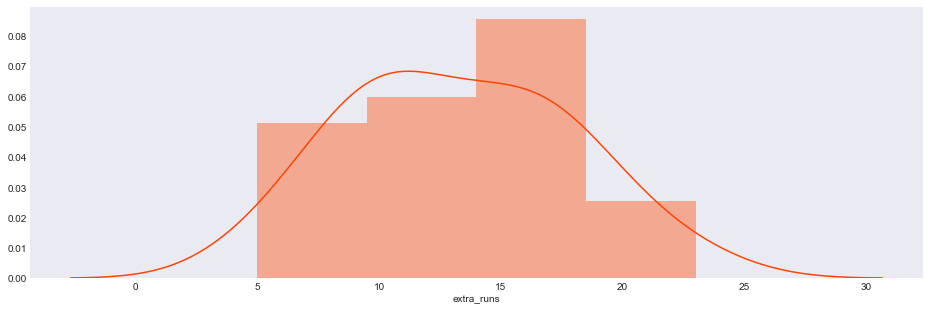

In [22]:
plt.figure(figsize=(16,5))

sns.distplot(extra_runs_count,color='orangered')

### From the above observation we can assume that there will be around 13-18 extra balls bowled in the match.